<a href="https://colab.research.google.com/github/KimuYounguWoo/machine-learning-programming/blob/main/IRIS_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IRIS(붓꽃 데이터) DATASET 다중 분류 문제
### 1. 데이터 준비
* Data를 csv 파일로 받아와 로드
* Data를 to_numpy()를 이용해, input과 target 형식으로 변환
### 2. 모델 생성
* input과 target을 학습과 테스트 데이터셋, 모델로 생성
* stratify properties의 의미와 사용 예
* 정규화
### 3. KNN
* KNN 훈련 및 Hyper-parameter 탐색
### 4. LogisticRegression
* LogisticRegression 훈련 및 Hyper-parameter 탐색
### 5. SGD
* SGD 훈련 및 Hyper-parameter 탐색
### 6. 결론
* 각 Hyper-Paramter 및 점수

# 데이터 준비
iris data를 읽어와 data에 저장하고, 컬럼명을 확인

In [11]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


각 컬럼명에서, 분류를 위해 사용할 특성(열)과 분류 타깃(열)을 구분한 후, numpy 행렬로 만들어 주자.

In [12]:
iris_input = data[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].to_numpy()
iris_target = data['Species'].to_numpy()

# 모델 생성
```
train_test_split(
input_data, -> 훈련 데이터
target_data, -> 타깃 데이터
shuffle, -> 넘파이 행렬의 순서를 섞을 것인가?
stratify, -> 학습 데이터와 훈련 데이터의 비율이 다를 경우, 비율을 맞춰주기 위해 사용
random_state -> 무작위 시드값
)
```
등의 파라미터가 존재

In [13]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    iris_input,
    iris_target,
    stratify = iris_target,
    random_state=42)

### 정규화
이유: 정규화를 진행하지 않을 경우, 수치가 다르니, 그 수치에 대해 통일하는 역할을 함.

In [14]:
from sklearn.preprocessing import StandardScaler

ss =  StandardScaler()
# 정규화 객체 생성

ss.fit(train_input)
# 데이터 학습

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
# 학습된 데이터를 정규화 진행

# 학습 및 예측 진행
## 파라미터를 최대한 Default 값으로 넣어 점수를 확인 후 최적화 작업을 진행

In [73]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
lr = LogisticRegression(max_iter = 10000)
sgd = SGDClassifier(max_iter = 200)
# 먼저, 파라미터를 최대한 기본으로 설정해 점수를 확인.

In [74]:
def kn_fit_score():
  kn.fit(train_scaled, train_target)
  print(f'KNN\'s train score = {kn.score(train_scaled, train_target)}')
  print(f'KNN\'s test score = {kn.score(test_input, test_target)}')

def lr_fit_score():
  lr.fit(train_scaled, train_target)
  print(f'LR\'s train score = {lr.score(train_scaled, train_target)}')
  print(f'LR\'s test score = {lr.score(test_input, test_target)}')

def sgd_fit_score():
  sgd.fit(train_scaled, train_target)
  print(f'SGD\'s train score = {sgd.score(train_scaled, train_target)}')
  print(f'SGD\'s test score = {sgd.score(test_input, test_target)}')

# 훈련 모델의 파라미터를 설정하고, 객체를 정의한 후 학습 후에 점수를 출력하는 함수를 작성

### KNN HyperParameter 탐색

In [19]:
# 먼저, 기본값으로 훈련 진행 후 점수 출력

kn = KNeighborsClassifier()
kn_fit_score()

KNN's train score = 0.9821428571428571
KNN's test score = 0.34210526315789475


테스트 정확도가 매~우 낮음 parameter 수정을 위해, 반복문을 이용해 이웃의 수를 조절하고, 이를 그래프로 표현한 후, 가장 최적의 파라미터를 찾아야 함.

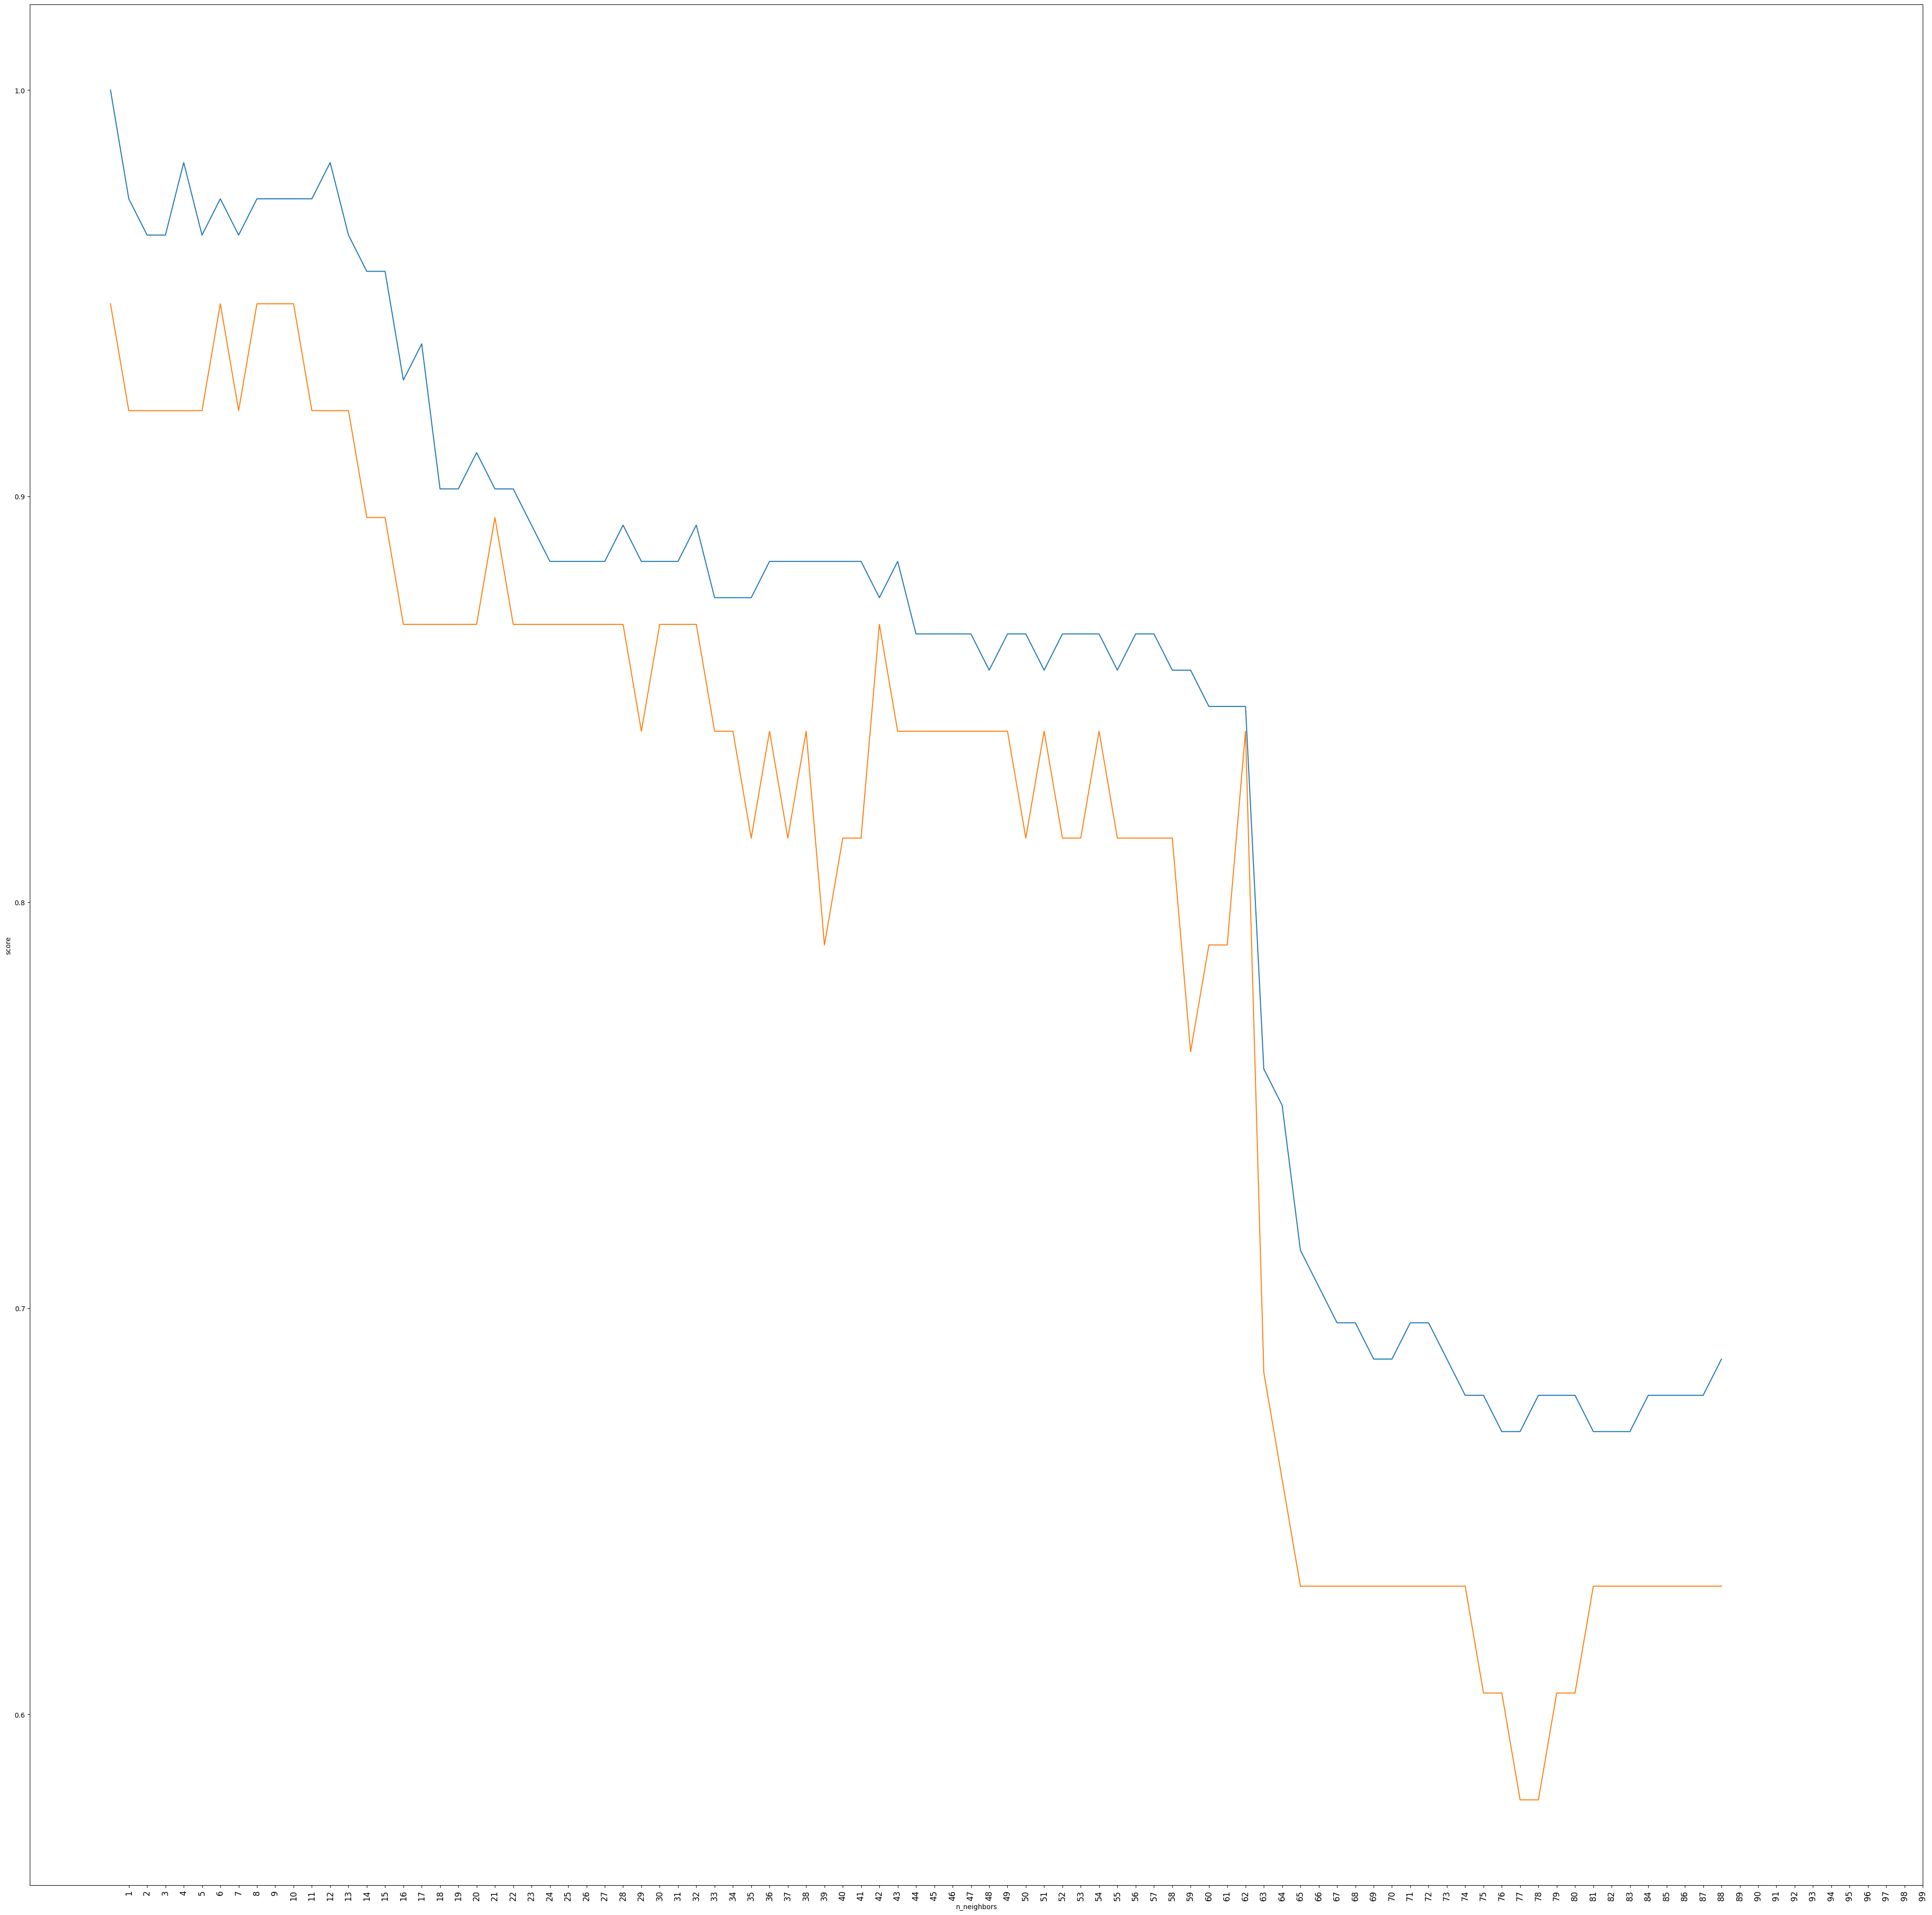

In [31]:
import matplotlib.pyplot as plt

# 위와 같이, 점수를 배열로 넣은 후, 그래프로 출력하는 것을 함수로 만들어서 사용할 예정
train_score_array = []
test_score_array = []

def kn_graph(max):
  for i in range(1, max):
    kn = KNeighborsClassifier(n_neighbors = i)
    kn.fit(train_scaled, train_target)
    if kn.score(test_scaled, test_target) < kn.score(train_scaled, train_target):
      train_score_array.append(kn.score(train_scaled, train_target))
      test_score_array.append(kn.score(test_scaled, test_target))
  plt.figure(figsize=(50,50))
  plt.plot(train_score_array)
  plt.plot(test_score_array)
  plt.xlabel('n_neighbors')
  plt.xticks(range(1, 100), rotation = 90, size = 12)
  plt.ylabel('score')
  plt.show()

kn_graph(100)

대략, 5~15 사이에서 최적의 값이 나오는 것으로 보임
하지만, 정확한 값을 알아내기 위해 배열의 값을 확인

In [33]:
print(train_score_array[5:15])
print(test_score_array[5:15])

[0.9642857142857143, 0.9732142857142857, 0.9642857142857143, 0.9732142857142857, 0.9732142857142857, 0.9732142857142857, 0.9732142857142857, 0.9821428571428571, 0.9642857142857143, 0.9553571428571429]
[0.9210526315789473, 0.9473684210526315, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.8947368421052632]


대략 0.43, 0.26, 0.43, 0.26, 0.26 ... 으로 이웃의 수는 6, 8, 9, 10이 최적으로 보임.

### LogisticRegression

In [51]:
# KNN과 마찬가지로 Default값 설정의 점수를 확인
lr = LogisticRegression(max_iter = 10000)
lr_fit_score()

LR's train score = 0.9732142857142857
LR's test score = 0.34210526315789475


테스트 점수가 마찬가지로 매우 낮게 나온다. 먼저 C를 건드려서 테스트를 진행하자.

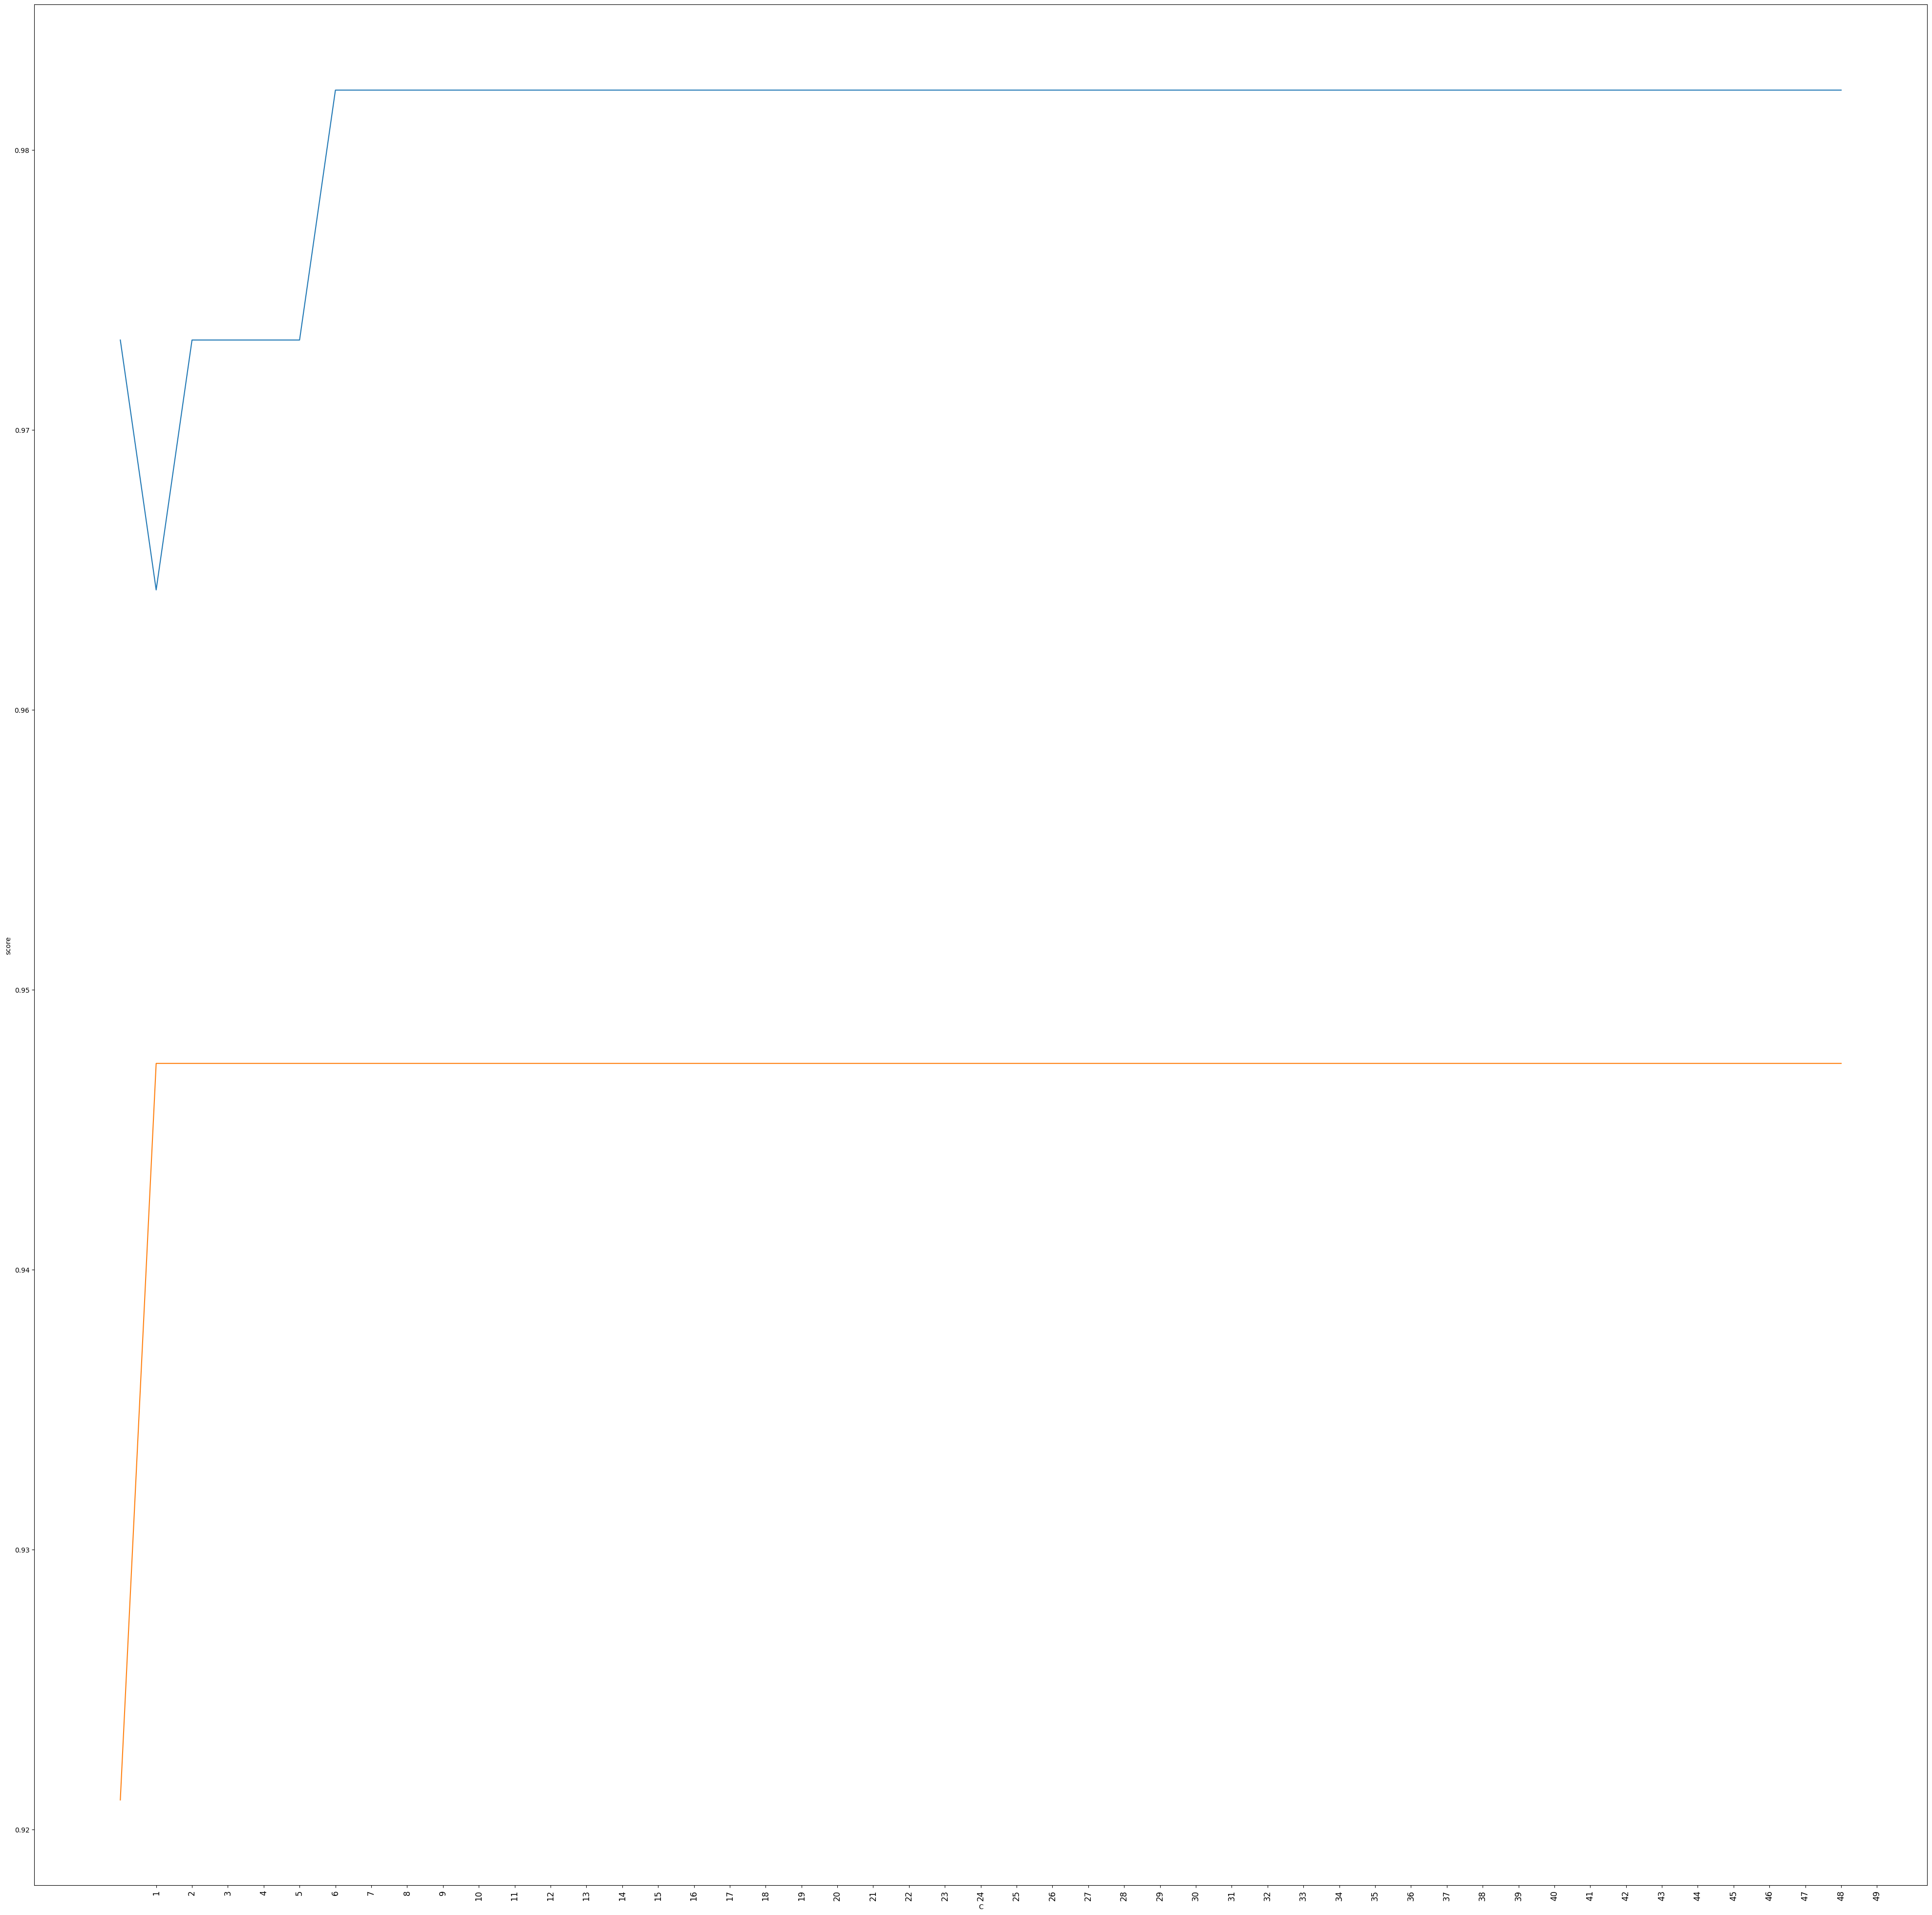

In [52]:
train_score_array = []
test_score_array = []
# 배열 초기화

def lr_graph(max):
  for i in range(1, max):
    lr = LogisticRegression(max_iter = 10000, C=i)
    lr.fit(train_scaled, train_target)
    train_score_array.append(lr.score(train_scaled, train_target))
    test_score_array.append(lr.score(test_scaled, test_target))
  plt.figure(figsize=(50,50))
  plt.plot(train_score_array)
  plt.plot(test_score_array)
  plt.xlabel('C')
  plt.xticks(range(1, max), rotation = 90, size = 12)
  plt.ylabel('score')
  plt.show()

lr_graph(50)

C=2 일때, 가장 좋은 것으로 나오지만 아직도 오차가 크다고 생각하여 다른 처리를 시도해보자


In [53]:
print(train_score_array[1])
print(test_score_array[1])

0.9642857142857143
0.9473684210526315


먼저, 얕은 지식으로 알고 있는 사실은 l1과 l2 규제를 같이 하는 것, 즉 *elasticnet*의 규제가 가장 효과가 좋다고 알고 있기에 이 규제를 적용하며, 규제를 적용하기 위해, ```solver: 'saga', l1_ratio```를 추가하여 모델을 생성해보자

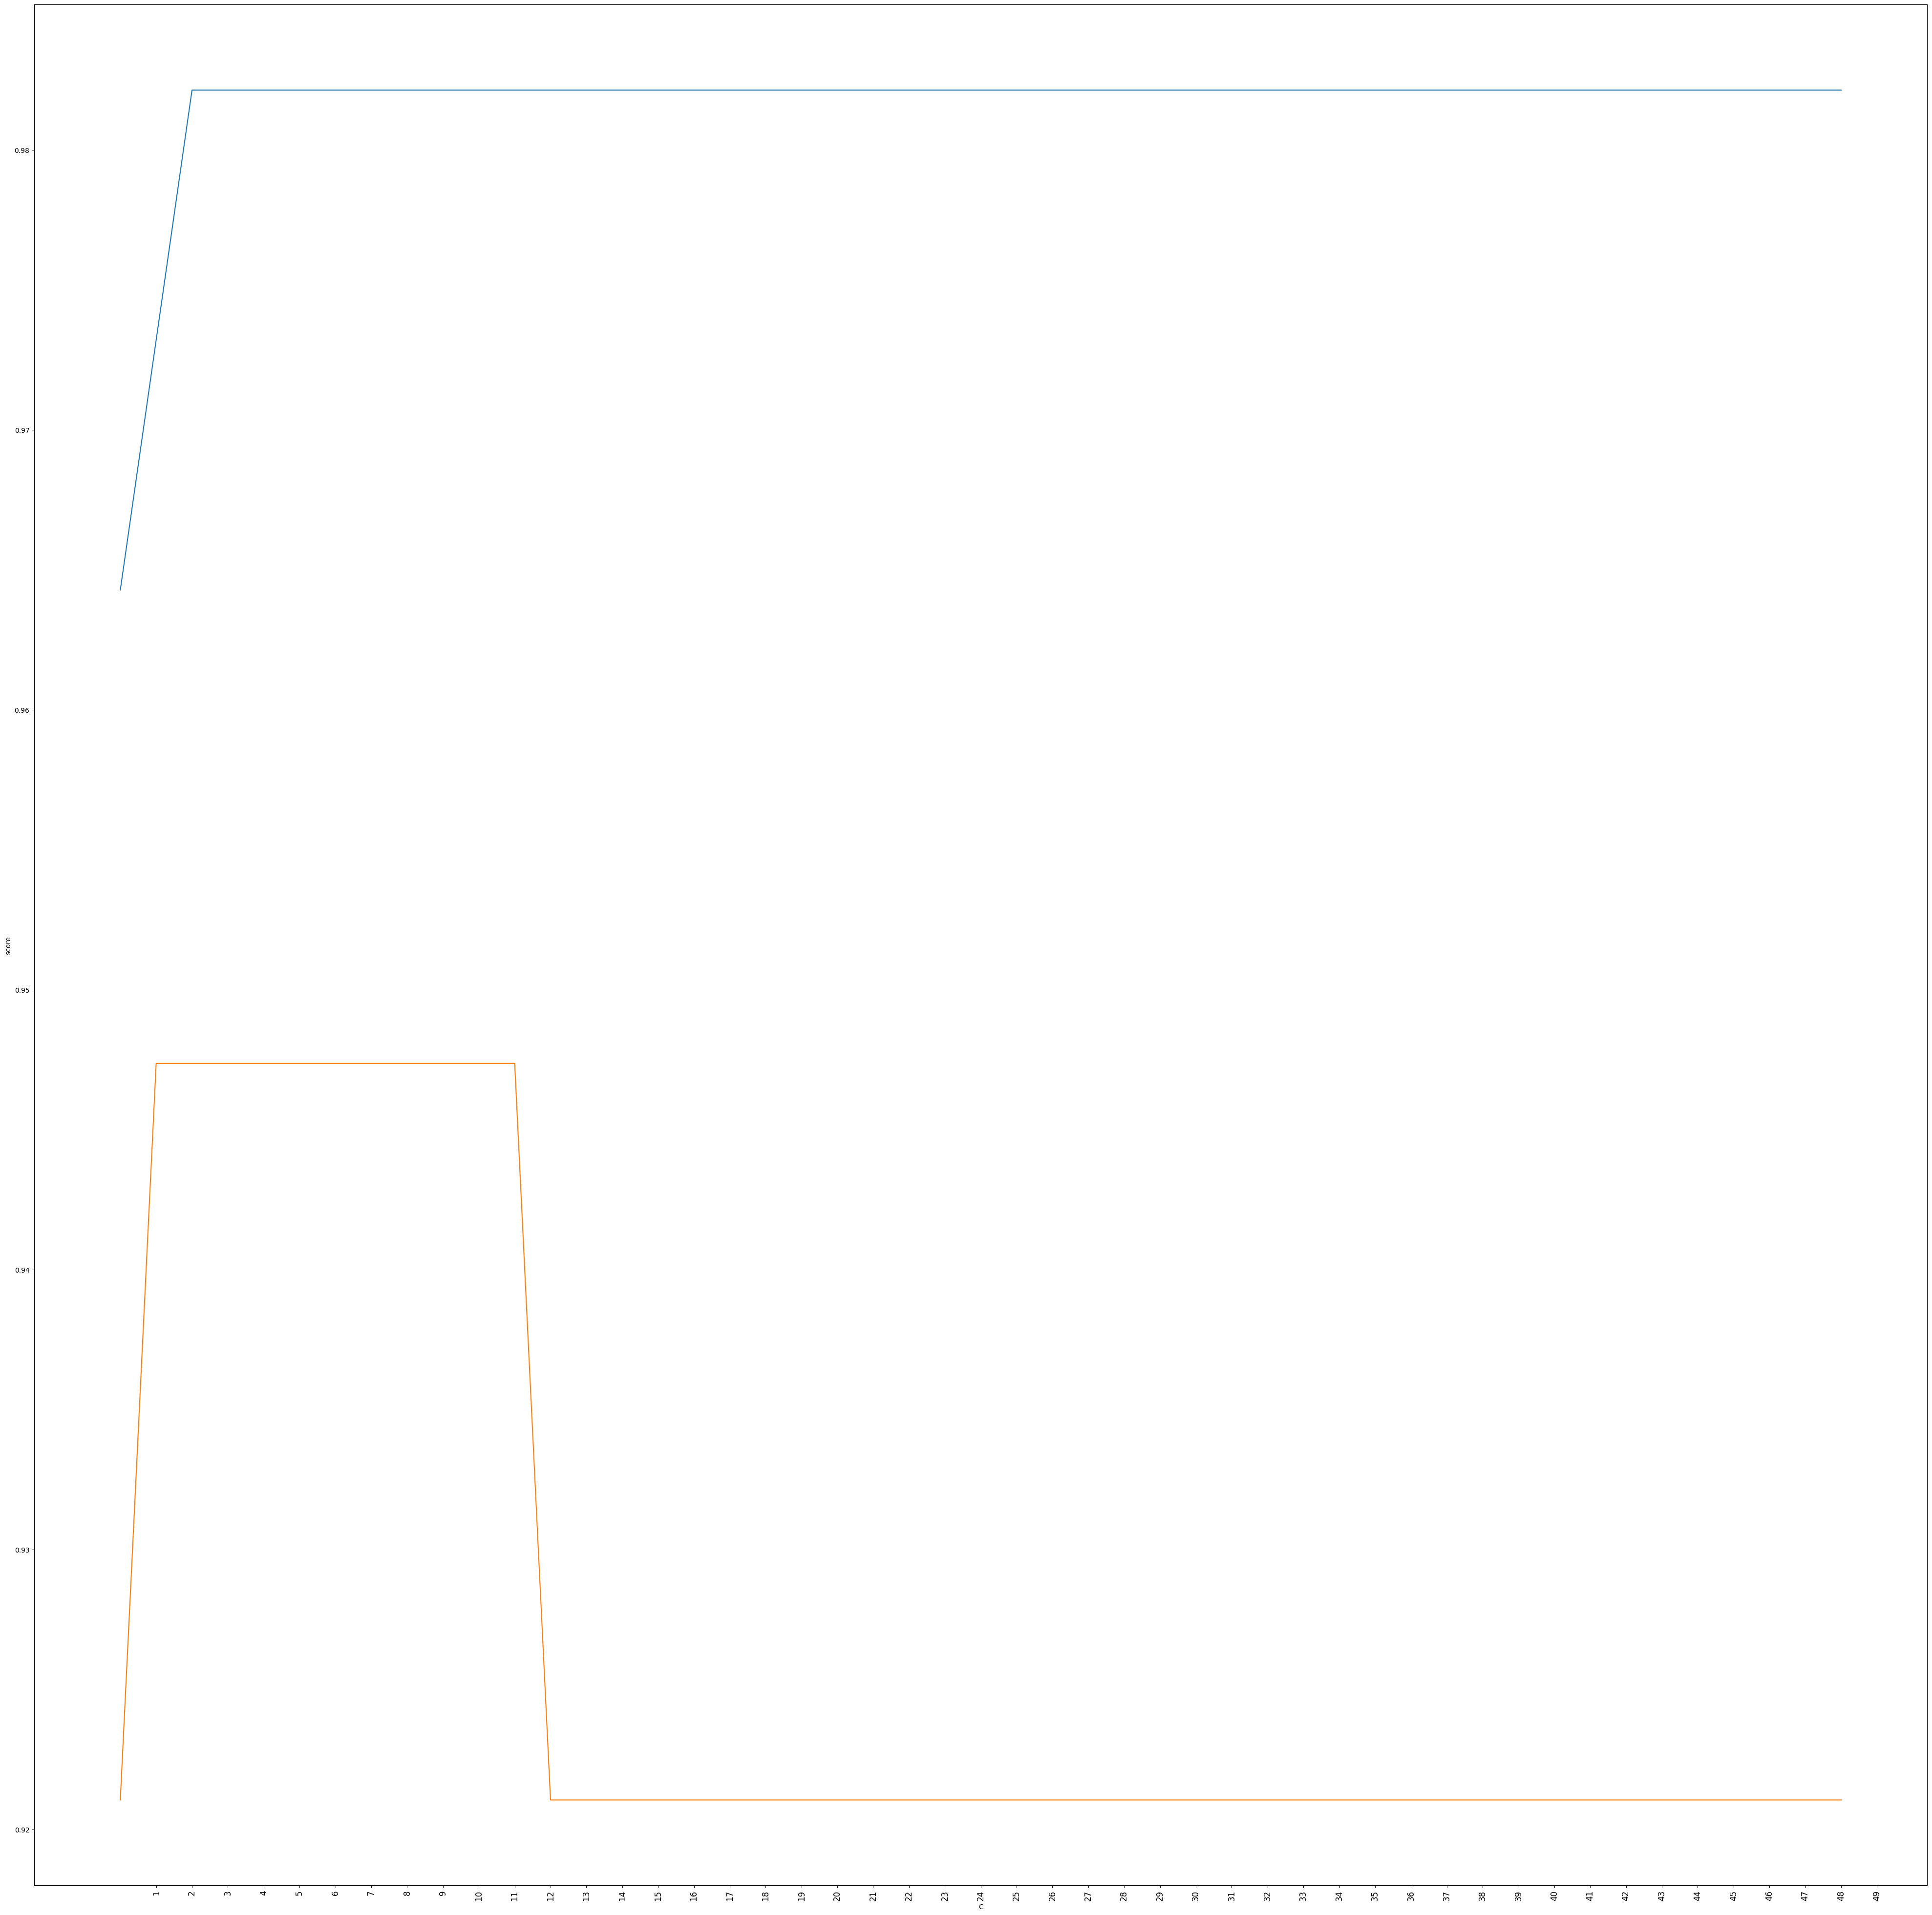

In [66]:
train_score_array = []
test_score_array = []
# 배열 초기화

def lr_graph_saga(max):
  for i in range(1, max):
    lr = LogisticRegression(max_iter = 10000, C=i, penalty = 'elasticnet', solver = 'saga', l1_ratio = 1)
    lr.fit(train_scaled, train_target)
    train_score_array.append(lr.score(train_scaled, train_target))
    test_score_array.append(lr.score(test_scaled, test_target))
  plt.figure(figsize=(50,50))
  plt.plot(train_score_array)
  plt.plot(test_score_array)
  plt.xlabel('C')
  plt.xticks(range(1, max), rotation = 90, size = 12)
  plt.ylabel('score')
  plt.show()

lr_graph_saga(50)

In [67]:
print(train_score_array[1])
print(test_score_array[1])

0.9732142857142857
0.9473684210526315


변화가 없다. 다른 규제를 적용해서 다시 진행하자
``` penalty = 'l1', solver = 'liblinear'```로 진행해보자.


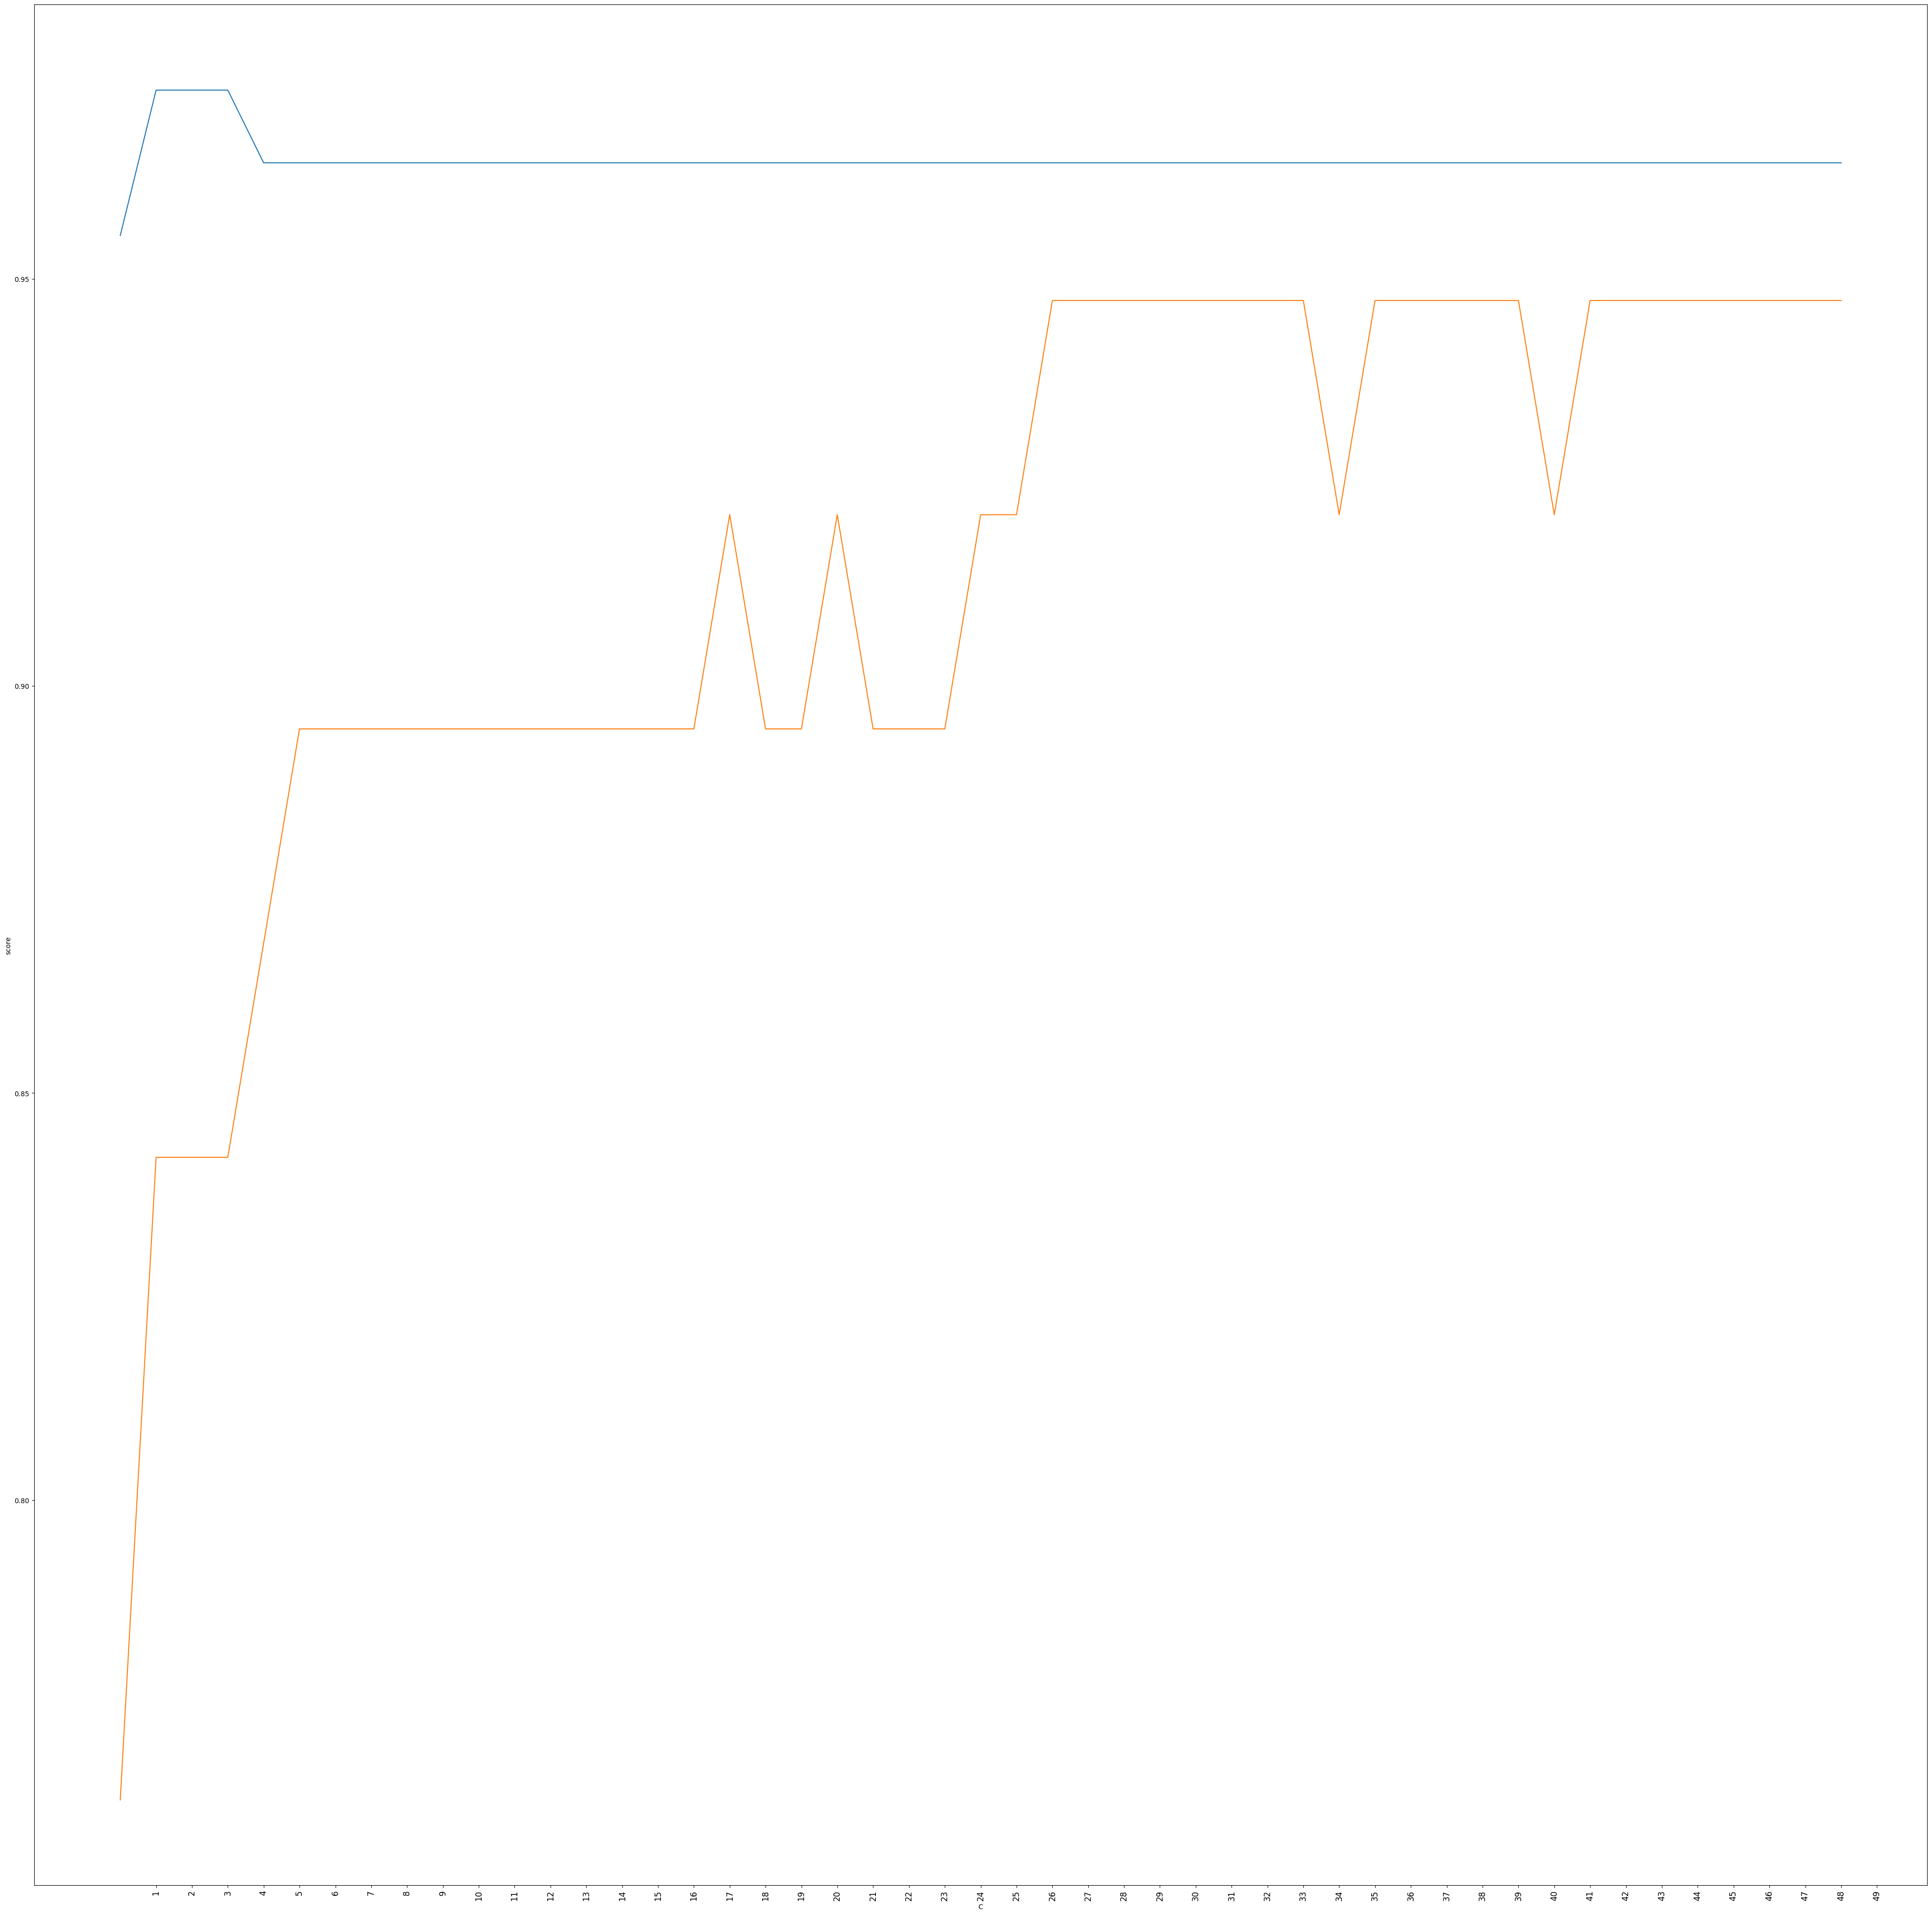

In [69]:
train_score_array = []
test_score_array = []
# 배열 초기화

def lr_graph_l1(max):
  for i in range(1, max):
    lr = LogisticRegression(max_iter = 10000, C=i, penalty = 'l1', solver = 'liblinear')
    lr.fit(train_scaled, train_target)
    train_score_array.append(lr.score(train_scaled, train_target))
    test_score_array.append(lr.score(test_scaled, test_target))
  plt.figure(figsize=(max,max))
  plt.plot(train_score_array)
  plt.plot(test_score_array)
  plt.xlabel('C')
  plt.xticks(range(1, max), rotation = 90, size = 12)
  plt.ylabel('score')
  plt.show()

lr_graph_l1(50)


아까와는 확연히 다른 그래프가 생성되었다.
대략 26 정도에 최적의 값을 가지는 것으로 보이며 확인하기 위해 25~28 정도 값을 체크한 후 최적화를 마무리하겠다.


In [71]:
print(train_score_array[25:29])
print(test_score_array[25:29])

[0.9642857142857143, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143]
[0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315]


LR의 최적 파라미터는 ```lr = LogisticRegression(max_iter = 10000, C=26, penalty = 'l1', solver = 'liblinear')```

### SGD
위와 마찬가지로, Default 설정의 점수를 출력

In [75]:
sgd_fit_score()

SGD's train score = 0.9553571428571429
SGD's test score = 0.39473684210526316


역시, 낮은 점수로 나오기에 손실 함수 설정 후, 다시 진행 ```sgd = SGDClassifier(max_iter = 200, loss = 'log_loss', random_state = 42)```
으로 설정 후, 클래스 설정한 후 부분 학습을 진행해 가장 좋은 값을 찾아보자.



In [76]:
import numpy as np

classes = np.unique(train_target)

sgd = SGDClassifier(max_iter = 200, loss = 'log_loss', random_state = 42)
sgd.fit(train_scaled, train_target)
print(sgd.score(train_scaled, train_target))
print(sgd.score(test_scaled, test_target))

0.8035714285714286
0.7894736842105263


두 점수 모두가 낮아졌지만, 두 점수의 차이가 낮아진 모습으로 보인다.<Br>
부분 학습을 진행해 가장 높은 점수를 찾는다.

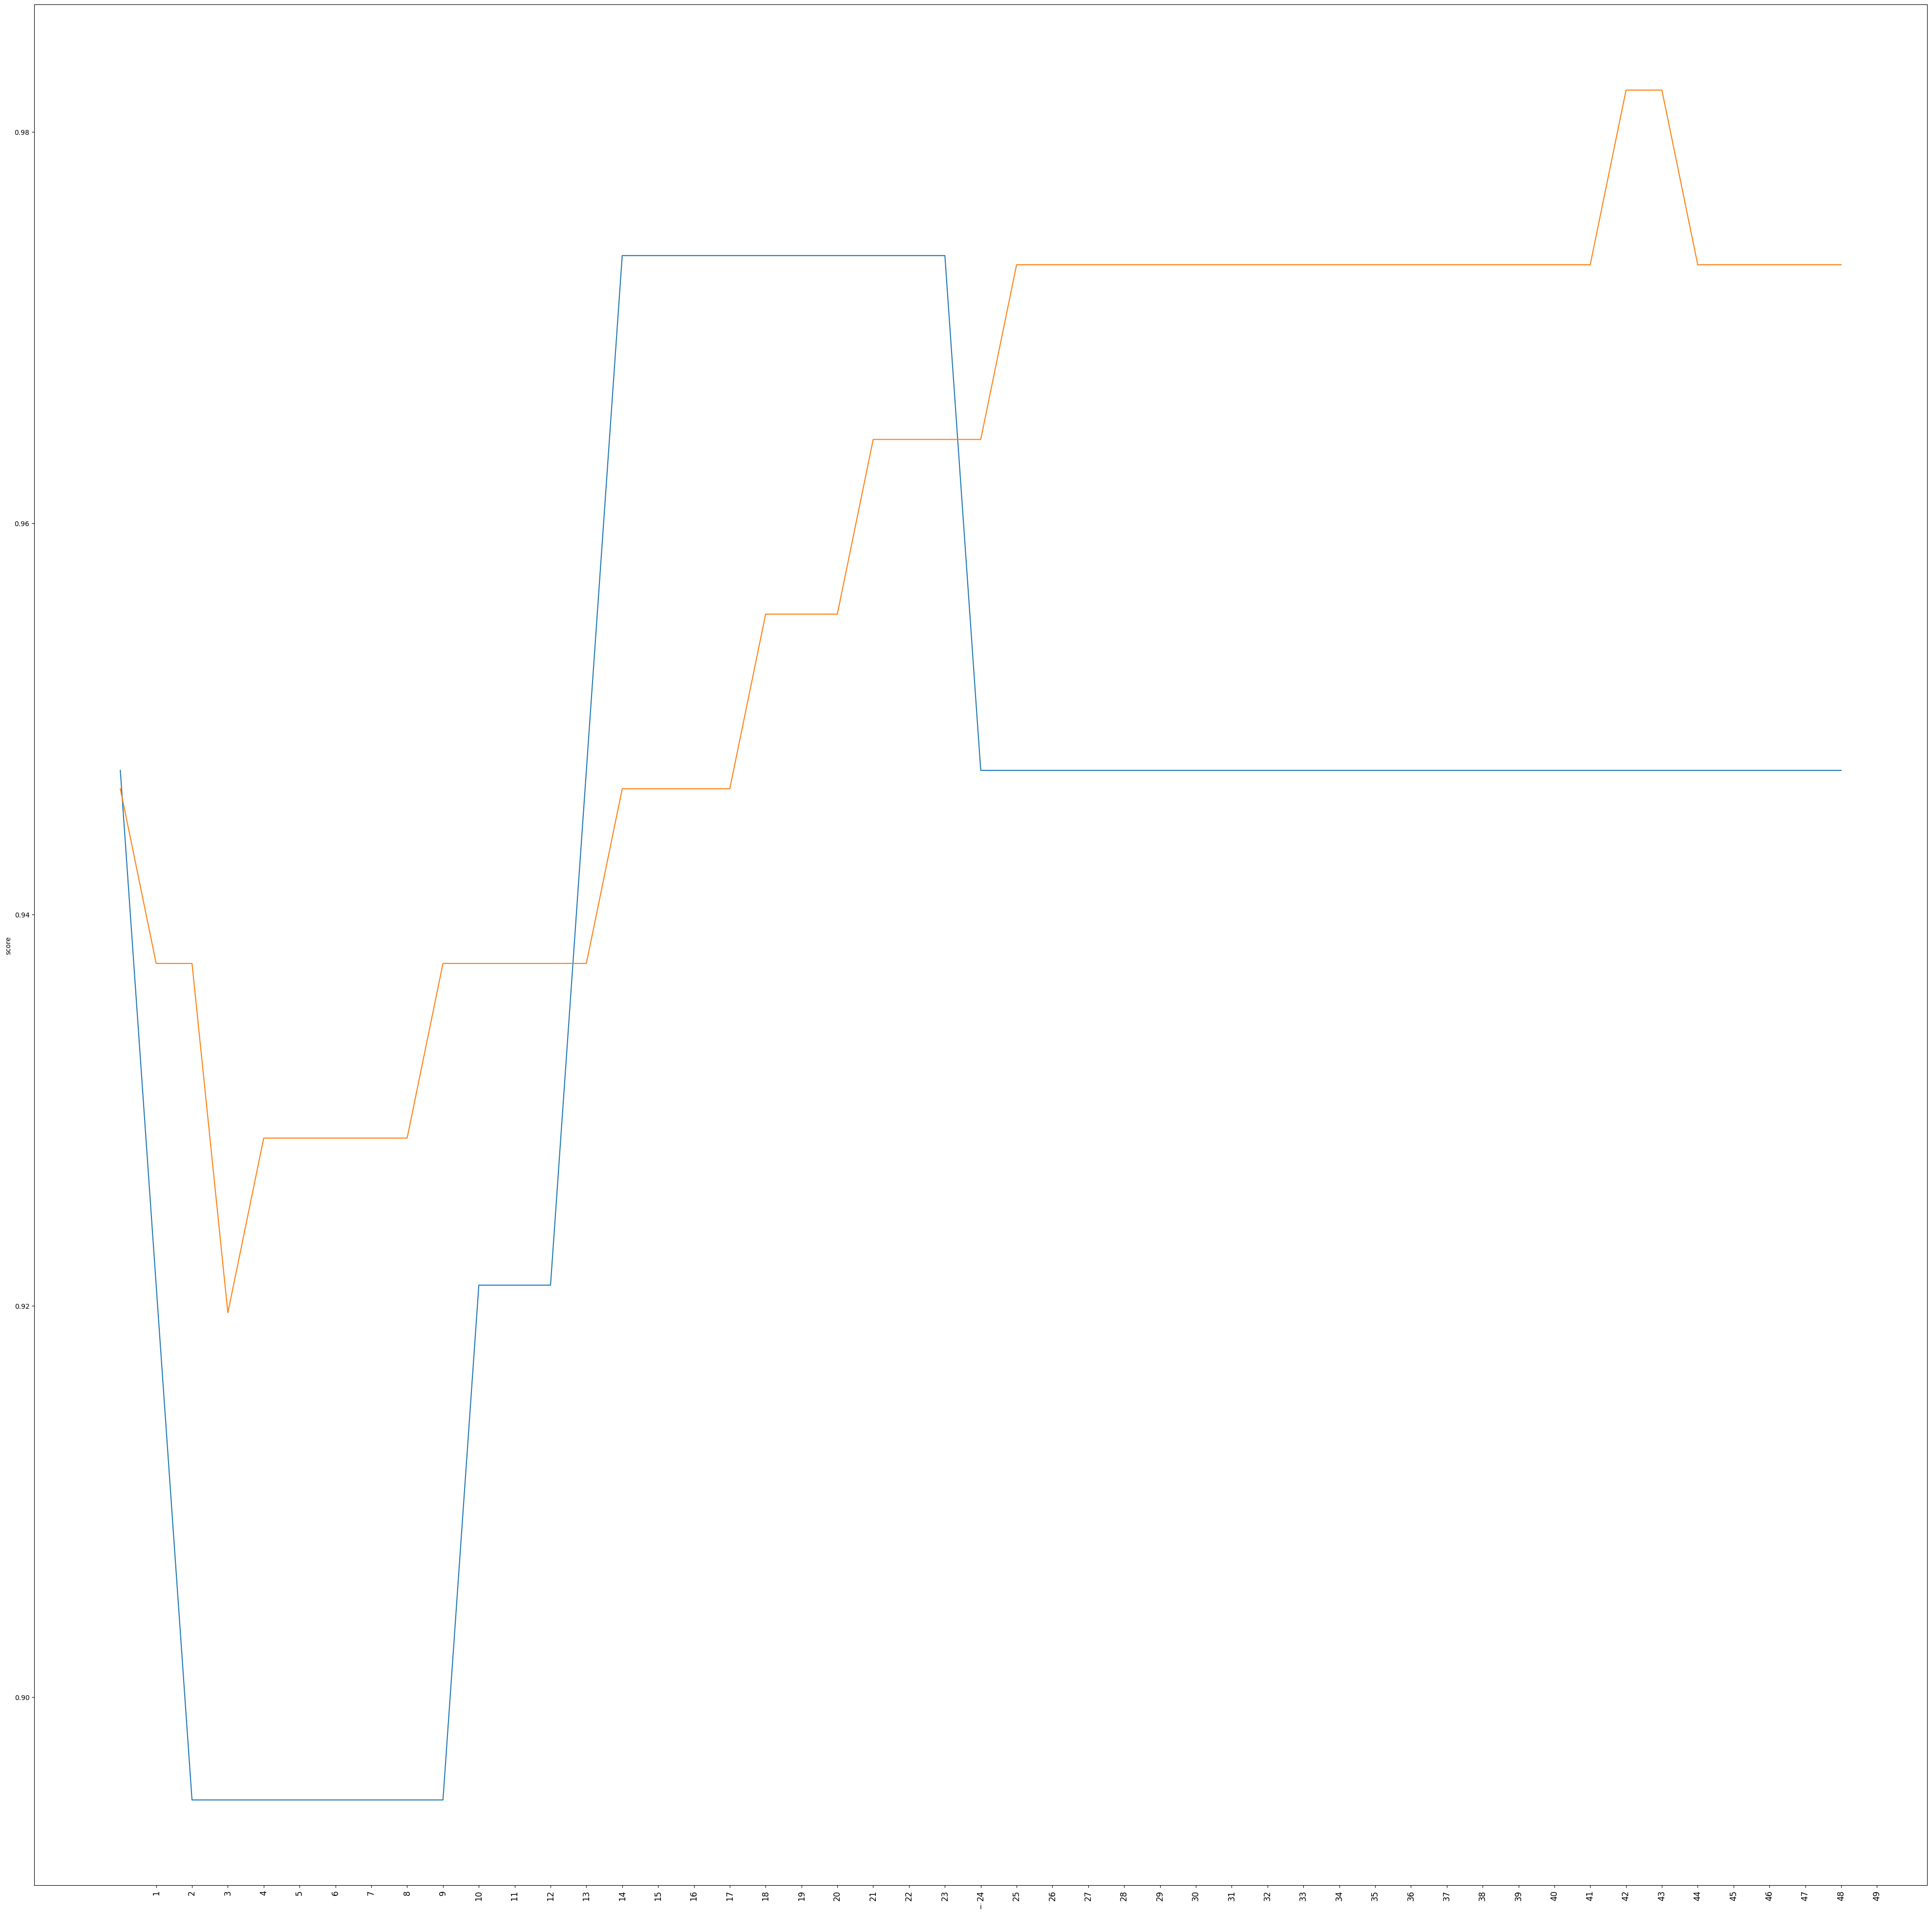

In [85]:
train_score_array = []
test_score_array = []

sgd = SGDClassifier(max_iter = 200, loss = 'log_loss', random_state = 42)
sgd.fit(train_scaled, train_target)
# SGD의 특성상 fit()은 초기화하는 것과 같기에, 초기화 훈련을 진행 후, 부분 훈련을 진행한다.

def sgd_graph(max):
  for i in range(1, max):
    sgd.partial_fit(train_scaled, train_target, classes=classes)
    train_score_array.append(sgd.score(test_scaled, test_target))
    test_score_array.append(sgd.score(train_scaled, train_target))
  plt.figure(figsize=(max,max))
  plt.plot(train_score_array)
  plt.plot(test_score_array)
  plt.xlabel('i')
  plt.xticks(range(1, max), rotation = 90, size = 12)
  plt.ylabel('score')
  plt.show()

sgd_graph(50)

그래프 상에서는 23번째 부분 훈련이 진행된 후, 가장 높은 점수를 보인다.

In [84]:
print(train_score_array[19:24])
print(test_score_array[19:24])

[0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]
[0.9553571428571429, 0.9553571428571429, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143]


21번째 인덱스에서 가장 높은 최적화를 달성한다.
이를 최종 점수로 사용한다.


# 결과
1. KNN's HyperParameter: ```kn = KNeighborsClassifier(n_neighbors = i)```
2. LogisticRegression's HyperParameter: ```lr = LogisticRegression(max_iter = 10000, C=26, penalty = 'l1', solver = 'liblinear')```
3. SGD's HyperParameter: ```SGDClassifier(max_iter = 200, loss = 'log_loss', random_state = 42)```